UE1: 12.672566371681416 UE2: 15.730337078651685 UE3: 12.959183673469388
Pass semester: True
UE1: 12.672566371681416 UE2: 15.730337078651685 UE3: 12.959183673469388
Pass semester: True


RuntimeError: Too early to create image: no default root window

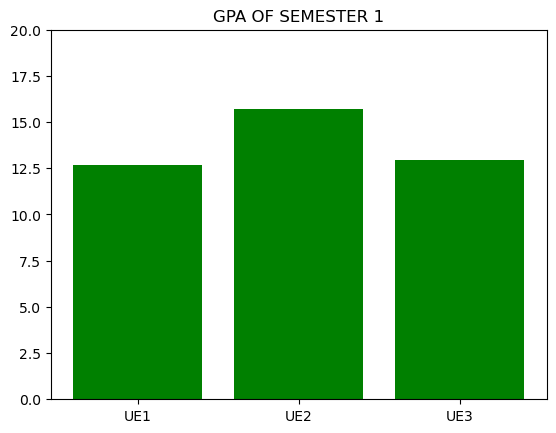

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk

coef_ue1 = {
    'R101':10, 'R102':10, 'R103':7, 'R104':7, 'R105':0, 'R106':5,
    'R107':0, 'R108':6, 'R109':0, 'R110':5, 'R111':4, 'R112':2,
    'R113':5, 'R114':5, 'R115':0, 'SAE11':20, 'SAE12':20, 'SAE13':0,
    'SAE14':0, 'SAE15':0, 'SAE16':7,
}

coef_ue2 = {
    'R101':4, 'R102':0, 'R103':2, 'R104':8, 'R105':6, 'R106':0,
    'R107':0, 'R108':0, 'R109':0, 'R110':5, 'R111':5, 'R112':2,
    'R113':9, 'R114':9, 'R115':3, 'SAE11':0, 'SAE12':0, 'SAE13':29,
    'SAE14':0, 'SAE15':0, 'SAE16':7,
}

coef_ue3 = {
    'R101':4, 'R102':0, 'R103':2, 'R104':0, 'R105':0, 'R106':5,
    'R107':15, 'R108':6, 'R109':4, 'R110':5, 'R111':5, 'R112':2,
    'R113':0, 'R114':0, 'R115':3, 'SAE11':0, 'SAE12':0, 'SAE13':0,
    'SAE14':20, 'SAE15':20, 'SAE16':7,
}


f = tk.Tk()
f.title("Moyenne des UES")
f.geometry("500x700")

titre = ttk.Label(f, text="Moyennes:", font=("bold", 30))
titre.grid(column=0, row=0)

liste_matieres = [
    "R101","R102","R103","R104","R105","R106",
    "R107","R108","R109","R110","R111","R112",
    "R113","R114","R115",
    "SAE11","SAE12","SAE13","SAE14","SAE15","SAE16"
]

entries = {}

for i, mat in enumerate(liste_matieres, start=2):
    ttk.Label(f, text=mat).grid(column=0, row=i)
    saisie = ttk.Entry(f)
    saisie.grid(column=1, row=i)
    entries[mat] = saisie


def calcul_ue(coef_ue: dict, notes: dict):
    gpa_ue = sum(notes[s] * coef_ue[s] for s in coef_ue)
    total_coeff = sum(coef_ue.values())
    return gpa_ue / total_coeff if total_coeff != 0 else 0

def get_color(gpa):
    if gpa >= 10:
        return 'green'
    elif 8 < gpa < 10:
        return 'orange'
    else:
        return 'red'

def pass_semester(cs: list):
    validUE = sum(1 for c in cs if c == 'green')
    if 'red' in cs:
        return False
    return validUE >= 2

def valider_toutes_les_notes():
    # Récupérer les notes
    notes = {}
    for mat, entry in entries.items():
        try:
            notes[mat] = float(entry.get())
        except ValueError:
            notes[mat] = 0.0

    # Calcul des GPA
    GPAS1UE1 = calcul_ue(coef_ue1, notes)
    GPAS1UE2 = calcul_ue(coef_ue2, notes)
    GPAS1UE3 = calcul_ue(coef_ue3, notes)

    colorUE1 = get_color(GPAS1UE1)
    colorUE2 = get_color(GPAS1UE2)
    colorUE3 = get_color(GPAS1UE3)
    cs1 = [colorUE1, colorUE2, colorUE3]

    # Résultat global
    passed = pass_semester(cs1)

    print("UE1:", GPAS1UE1, "UE2:", GPAS1UE2, "UE3:", GPAS1UE3)
    print("Pass semester:", passed)

    # Afficher graphiquement
    plt.bar(['UE1', 'UE2', 'UE3'], [GPAS1UE1, GPAS1UE2, GPAS1UE3], color=cs1)
    plt.title('GPA OF SEMESTER 1')
    plt.ylim(0, 20)
    plt.savefig('graph.png')



btn_valider = ttk.Button(f, text="Valider toutes les notes", command=valider_toutes_les_notes)
btn_valider.grid(column=1, row=len(liste_matieres) + 3, pady=20)

f.mainloop()




img=Image.open("graph.png")
img=img.resize((400,400))

photo=ImageTk.PhotoImage(img)

canvas= tk.Canvas(f,width=400,height=400)
canvas.pack()

canvas.create_image(0,0,image=photo, anchor="nw") # Incrage au coin gauche 

fenetre.mainloop()